In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def load_data():
    data = pd.read_csv('data.csv')
    return data


def normalization(data):
    data = (data - data.min()) / (data.max() - data.min())
    return data


def prepare_data():
    data = load_data()
    x = data.iloc[:, 0:-1].values
    y = data.iloc[:, -1].values
    x = normalization(x)
    x = np.array(x)
    y = np.array(y)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    return x_train, y_train, x_test, y_test

def stochastic_gradient_descent(x_train, y_train, learning_rate, epochs):
    m = len(x_train)
    theta_1 = np.random.randn(x_train.shape[1])
    theta_0 = np.random.randn(1)
    cost_list = []
    for i in range(epochs):
        cost = 0
        for j in range(m):
            y_pred = np.dot(theta_1, x_train[j]) + theta_0
            theta_1 = theta_1 - learning_rate * (y_pred - y_train[j]) * x_train[j]
            theta_0 = theta_0 - learning_rate * (y_pred - y_train[j])
            cost += (y_pred - y_train[j]) ** 2
        cost = cost / m
        cost_list.append(cost)

    return theta_1, theta_0, cost_list

def predict(x_test, theta_1, theta_0):
    y_pred = np.dot(theta_1, x_test.T) + theta_0
    return y_pred

def mse(prediction, y_test):
    mse = np.square(np.subtract(y_test,prediction)).mean()
    return mse

x_train, y_train, x_test, y_test = prepare_data()
theta_1, theta_0, cost_list = stochastic_gradient_descent(x_train, y_train, 0.01, 500)


print("theta_1: ", theta_1)
print("theta_0: ", theta_0)


theta_1:  [-50.45584283]
theta_0:  [79.76404595]


MSE Train:  16.641967142617794


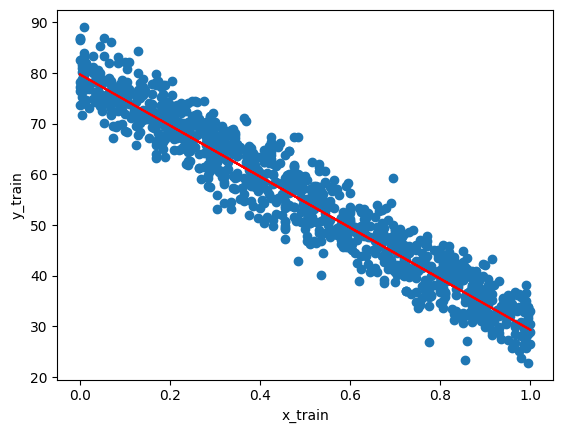

In [2]:
predicted_y_train = predict(x_train, theta_1, theta_0)
print("MSE Train: ", mse(predicted_y_train, y_train))

# plot the train data
plt.scatter(x_train, y_train)
plt.plot(x_train, predicted_y_train, color='red')
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.show()

MSE Test:  15.34999681126091


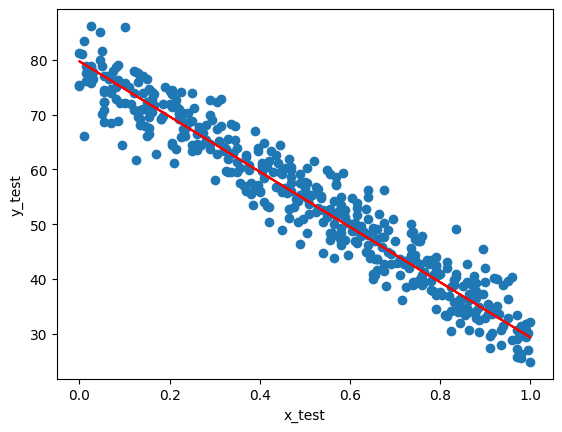

In [3]:
predicted_y_test = predict(x_test, theta_1, theta_0)
print("MSE Test: ", mse(predicted_y_test, y_test))

#plot the test data
plt.scatter(x_test, y_test)
plt.plot(x_test, predicted_y_test, color='red')
plt.xlabel("x_test")
plt.ylabel("y_test")
plt.show()


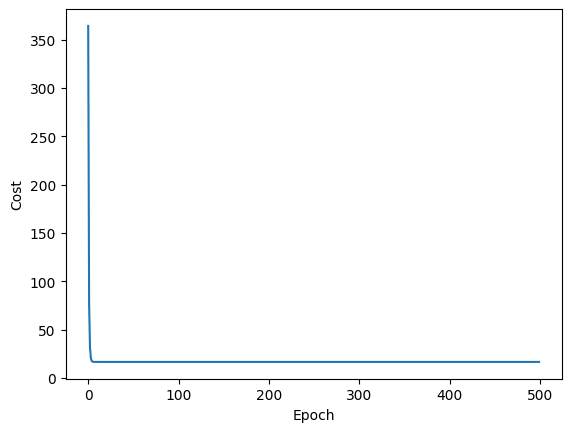

In [4]:
# plot the cost list
plt.plot(cost_list)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

In [5]:
print("y = ", theta_1[0], "x +", theta_0[0])

y =  -50.45584282710759 x + 79.76404595371014
